# GABAa models

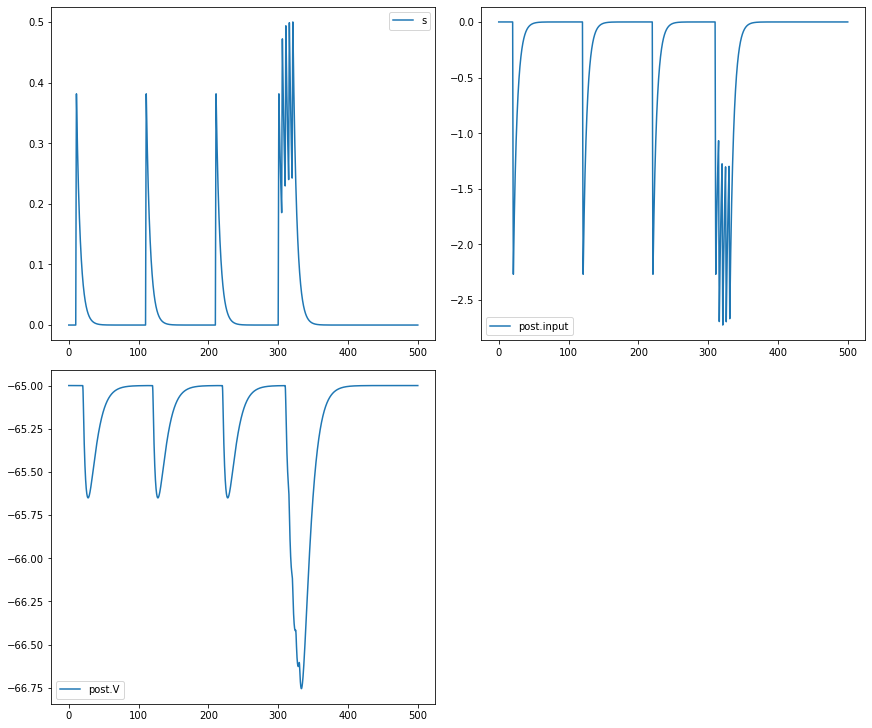

In [5]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import brainpy as bp
import brainpy.numpy as np
import bpmodels
from bpmodels.neurons import get_LIF


duration = 500.
dt = 0.02
bp.profile.set(backend="numba", dt=dt, merge_steps=True, show_code=False)
LIF_neuron = get_LIF()
GABAa_syn = bpmodels.synapses.get_GABAa2()

# build and simulate gabaa net
pre = bp.NeuGroup(LIF_neuron, geometry=(10,), monitors=['V', 'input', 'spike'])
pre.runner.set_schedule(['input', 'update', 'monitor', 'reset'])
pre.pars['V_rest'] = -65.
pre.ST['V'] = -65.
post = bp.NeuGroup(LIF_neuron, geometry=(10,), monitors=['V', 'input', 'spike'])
post.runner.set_schedule(['input', 'update', 'monitor', 'reset'])
post.pars['V_rest'] = -65.
post.ST['V'] = -65.

gabaa = bp.SynConn(model=GABAa_syn, pre_group=pre, post_group=post,
                   conn=bp.connect.All2All(), monitors=['s'], delay=10.)
gabaa.runner.set_schedule(['input', 'update', 'output', 'monitor'])

net = bp.Network(pre, gabaa, post)

current = bp.inputs.spike_current([10, 110, 210, 300, 305, 310, 315, 320],
                                  bp.profile._dt, 1., duration=duration)
net.run(duration=duration, inputs=[gabaa, 'pre.spike', current, "="], report=False)

# paint gabaa
ts = net.ts
fig, gs = bp.visualize.get_figure(2, 2, 5, 6)

fig.add_subplot(gs[0, 0])
plt.plot(ts, gabaa.mon.s[:, 0], label='s')
plt.legend()

fig.add_subplot(gs[1, 0])
plt.plot(ts, post.mon.V[:, 0], label='post.V')
plt.legend()

fig.add_subplot(gs[0, 1])
plt.plot(ts, post.mon.input[:, 0], label='post.input')
plt.legend()

plt.show()